In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import os

In [2]:
# Ruta al archivo Excel
file_path = r"C:\Users\QV6522\Downloads\Definitivos\2311-Definitivo\Saldos Transmisión Zonal y Dedicado D7T 2311-def.xlsx"

# Leer las hojas 'Prorrata_Zonal' y 'Prorrata_Dedicado' del archivo Excel
try:
    df_zonal = pd.read_excel(file_path, sheet_name='Prorrata_Zonal', usecols='B:AA', skiprows=4)
    df_dedicado = pd.read_excel(file_path, sheet_name='Prorrata_Dedicado', usecols='B:U', skiprows=5)
    print("Hojas leídas exitosamente.")
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")

# Columnas seleccionadas para ambos DataFrames
columnas_seleccionadas_zonal = [
    'MES', 'VATT [$]', 'VATT/12 [$]', 'VATT mensual acumulado [$]', 
    'ITE [$]', 'ITP [$]', 'Ingreso Repartición\n CT [$]', 
    'Reasignación Sistema Ingreso CT [$]', 'Saldo Mensual [$]', 
    'Saldo Mensual Ajustado por IPC [$]', 'Efectos Ajuste IPC [$]', 
    'Saldo Acumulado sin Reasignación [$]', 'Saldo Acumulado con Reasignación [$]'
]

columnas_seleccionadas_dedicado = [
    'MES', 'VATT [$]', 'VATT/12 [$]', 'VATT mensual acumulado [$]', 
    'ITE [$]', 'ITP [$]', 'Ingreso Repartición CT [$]', 'Saldo Mensual [$]', 
    'Saldo Mensual Ajustado por IPC [$]', 'Efectos Ajuste IPC [$]', 'Saldo Acumulado [$]'
]

# Filtrar por el valor "ENGIE" en la columna "PROPIETARIO"
df_engie_zonal_filtrado = df_zonal[df_zonal['PROPIETARIO'] == 'ENGIE'][columnas_seleccionadas_zonal]
df_engie_dedicado_filtrado = df_dedicado[df_dedicado['PROPIETARIO'] == 'ENGIE'][columnas_seleccionadas_dedicado]

# Mostrar las primeras filas para verificar
# print("DataFrame Zonal Filtrado:")
# print(df_engie_zonal_filtrado.head())
# print("\nDataFrame Dedicado Filtrado:")
# print(df_engie_dedicado_filtrado.head())

Hojas leídas exitosamente.


In [3]:
# Para df_engie_zonal_filtrado
df_engie_zonal_filtrado = df_engie_zonal_filtrado.copy()
df_engie_zonal_filtrado['MES'] = pd.to_datetime(df_engie_zonal_filtrado['MES'])
columnas_para_convertir_zonal = columnas_seleccionadas_zonal[1:]
df_engie_zonal_filtrado[columnas_para_convertir_zonal] = df_engie_zonal_filtrado[columnas_para_convertir_zonal].fillna(0)
df_engie_zonal_filtrado[columnas_para_convertir_zonal] = df_engie_zonal_filtrado[columnas_para_convertir_zonal].apply(lambda x: round(x / 1000000, 1))

# Para df_engie_dedicado_filtrado
df_engie_dedicado_filtrado = df_engie_dedicado_filtrado.copy()
df_engie_dedicado_filtrado['MES'] = pd.to_datetime(df_engie_dedicado_filtrado['MES'])
columnas_para_convertir_dedicado = columnas_seleccionadas_dedicado[1:]
df_engie_dedicado_filtrado[columnas_para_convertir_dedicado] = df_engie_dedicado_filtrado[columnas_para_convertir_dedicado].fillna(0)
df_engie_dedicado_filtrado[columnas_para_convertir_dedicado] = df_engie_dedicado_filtrado[columnas_para_convertir_dedicado].apply(lambda x: round(x / 1000000, 1))

# Mostrar las primeras filas para verificar
# print("DataFrame Zonal Filtrado después de la conversión:")
# print(df_engie_zonal_filtrado.head())
# print("\nDataFrame Dedicado Filtrado después de la conversión:")
# print(df_engie_dedicado_filtrado.head())

In [4]:
# Para df_engie_zonal_filtrado
# Encontrar la fecha más reciente en el DataFrame Zonal
fecha_mas_reciente_zonal = df_engie_zonal_filtrado['MES'].max()

# Calcular la fecha de inicio para los últimos 12 meses para Zonal
fecha_inicio_zonal = fecha_mas_reciente_zonal - pd.DateOffset(months=12)

# Filtrar para obtener solo los registros de los últimos 12 meses en Zonal
df_ultimos_12_zonal = df_engie_zonal_filtrado[(df_engie_zonal_filtrado['MES'] <= fecha_mas_reciente_zonal) & (df_engie_zonal_filtrado['MES'] > fecha_inicio_zonal)]

# Para df_engie_dedicado_filtrado
# Encontrar la fecha más reciente en el DataFrame Dedicado
fecha_mas_reciente_dedicado = df_engie_dedicado_filtrado['MES'].max()

# Calcular la fecha de inicio para los últimos 12 meses para Dedicado
fecha_inicio_dedicado = fecha_mas_reciente_dedicado - pd.DateOffset(months=12)

# Filtrar para obtener solo los registros de los últimos 12 meses en Dedicado
df_ultimos_12_dedicado = df_engie_dedicado_filtrado[(df_engie_dedicado_filtrado['MES'] <= fecha_mas_reciente_dedicado) & (df_engie_dedicado_filtrado['MES'] > fecha_inicio_dedicado)]

# Mostrar las primeras filas de los DataFrames filtrados para verificar
# print("DataFrame Zonal de los Últimos 12 Meses:")
# print(df_ultimos_12_zonal.head())
# print("\nDataFrame Dedicado de los Últimos 12 Meses:")
# print(df_ultimos_12_dedicado.head())

In [5]:
# Para df_ultimos_12_zonal
# Seleccionar las columnas para Zonal
df_IngresosTotales_zonal = df_ultimos_12_zonal[['MES',
                                                'VATT/12 [$]',
                                                'ITE [$]',
                                                'ITP [$]',
                                                'Ingreso Repartición\n CT [$]',
                                                'Reasignación Sistema Ingreso CT [$]']].copy()

# Calcular la nueva columna 'IngresosTotales' para Zonal
df_IngresosTotales_zonal['IngresosTotales'] = df_IngresosTotales_zonal[['ITE [$]', 
                                                                        'ITP [$]', 
                                                                        'Ingreso Repartición\n CT [$]',
                                                                        'Reasignación Sistema Ingreso CT [$]']].sum(axis=1)

# Calcular la nueva columna 'IngresosCU' para Zonal
df_IngresosTotales_zonal['IngresosCU'] = df_IngresosTotales_zonal['Ingreso Repartición\n CT [$]'] + df_IngresosTotales_zonal['Reasignación Sistema Ingreso CT [$]']

# Para df_ultimos_12_dedicado
# Seleccionar las columnas para Dedicado
df_IngresosTotales_dedicado = df_ultimos_12_dedicado[['MES',
                                                      'VATT/12 [$]',
                                                      'ITE [$]',
                                                      'ITP [$]',
                                                      'Ingreso Repartición CT [$]']].copy()

# Calcular la nueva columna 'IngresosTotales' para Dedicado
df_IngresosTotales_dedicado['IngresosTotales'] = df_IngresosTotales_dedicado[['ITE [$]', 
                                                                              'ITP [$]', 
                                                                              'Ingreso Repartición CT [$]']].sum(axis=1)

# Para 'IngresosCU', usar solo 'Ingreso Repartición CT [$]' para Dedicado
df_IngresosTotales_dedicado['IngresosCU'] = df_IngresosTotales_dedicado['Ingreso Repartición CT [$]']


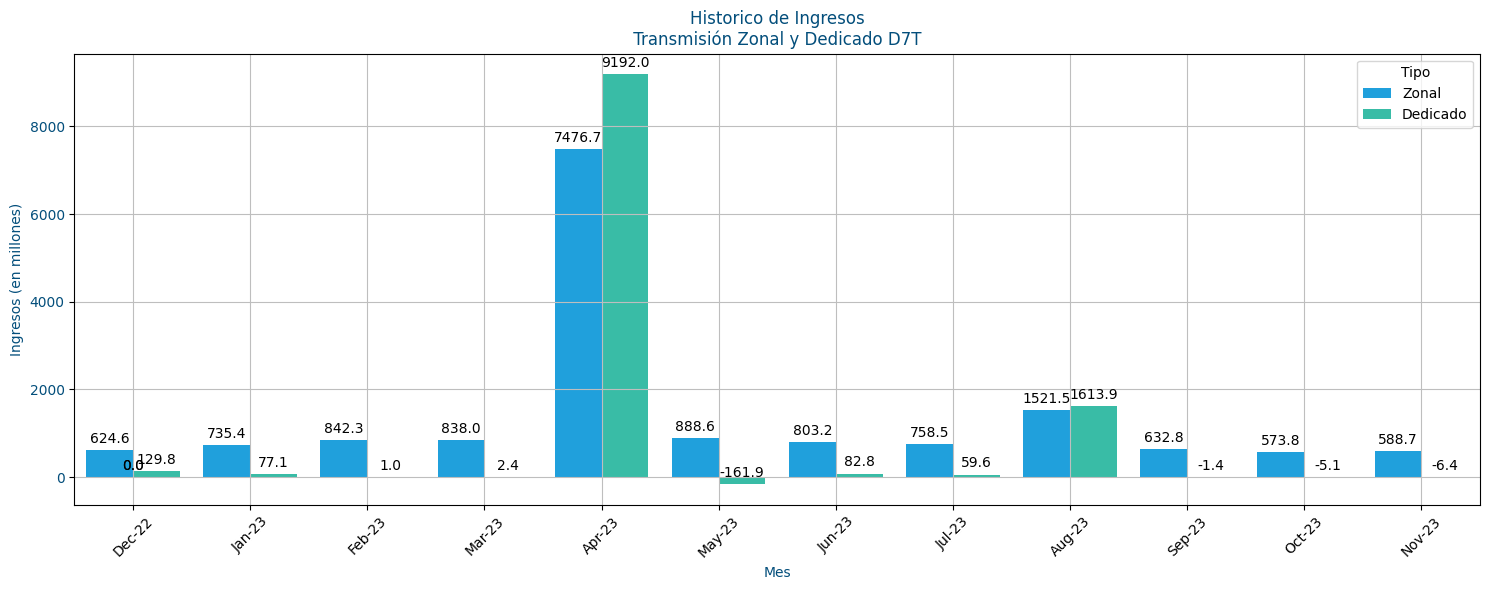

In [6]:
# Definición de la paleta de colores
colores = {
    "Azul Corporativo": "#01ACFB",
    "Turquesa": "#23D2B5",
    "Azul Oscuro": "#034E7B",
    "Verde Oliva Suave": "#A8B07A",
    "Coral Claro": "#FF8A65",
    "Gris Neutro": "#BEBEBE"
}

# Fusionar los DataFrames 'df_IngresosTotales_zonal' y 'df_IngresosTotales_dedicado'
df_IngresosTotales_zonal['Tipo'] = 'Zonal'
df_IngresosTotales_dedicado['Tipo'] = 'Dedicado'
df_combinado = pd.concat([df_IngresosTotales_zonal, df_IngresosTotales_dedicado])

# Crear un gráfico de barras agrupadas para IngresosTotales
plt.figure(figsize=(15, 6))
barras = sns.barplot(data=df_combinado, x='MES', y='IngresosTotales', hue='Tipo', palette=["#01ACFB", "#23D2B5"])

# Formatear el eje x en el formato "mmm-YY"
meses_unicos = df_combinado['MES'].dt.strftime("%b-%y").unique()
plt.xticks(range(len(meses_unicos)), meses_unicos, rotation=45)

# Agregar etiquetas de datos en cada barra
for barra in barras.patches:
    barras.annotate(format(barra.get_height(), '.1f'), 
                    (barra.get_x() + barra.get_width() / 2, 
                     barra.get_height()), ha='center', va='center',
                    xytext=(0, 8), textcoords='offset points')

# Decorar el gráfico
plt.title('Historico de Ingresos\n Transmisión Zonal y Dedicado D7T ', color=colores["Azul Oscuro"])
plt.xlabel('Mes', color=colores["Azul Oscuro"])
plt.ylabel('Ingresos (en millones)', color=colores["Azul Oscuro"])
plt.yticks(color=colores["Azul Oscuro"])
plt.grid(True, color=colores["Gris Neutro"])
plt.legend(title='Tipo')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


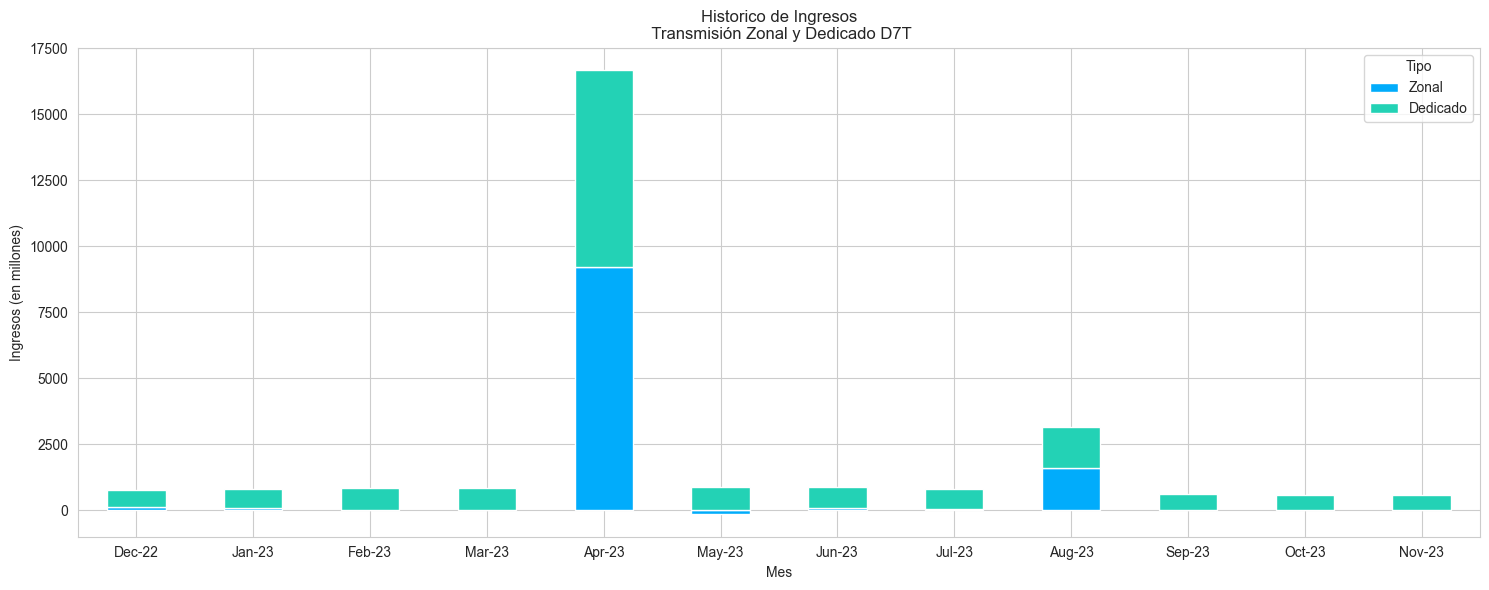

In [7]:
# Asegurarse de que 'MES' esté en formato de fecha en ambos DataFrames
df_IngresosTotales_zonal['MES'] = pd.to_datetime(df_IngresosTotales_zonal['MES'])
df_IngresosTotales_dedicado['MES'] = pd.to_datetime(df_IngresosTotales_dedicado['MES'])

# Fusionar los DataFrames 'df_IngresosTotales_zonal' y 'df_IngresosTotales_dedicado'
df_IngresosTotales_zonal['Tipo'] = 'Zonal'
df_IngresosTotales_dedicado['Tipo'] = 'Dedicado'
df_combinado = pd.concat([df_IngresosTotales_zonal, df_IngresosTotales_dedicado])

# Definir una paleta de colores
colores = ["#01ACFB", "#23D2B5"]

# Crear un gráfico de barras apiladas para IngresosTotales
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
barras = df_combinado.groupby(['MES', 'Tipo'])['IngresosTotales'].sum().unstack().plot(kind='bar', stacked=True, color=colores, ax=plt.gca())

# Formatear el eje x en el formato "mmm-YY"
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df_combinado['MES'].dt.strftime("%b-%y").unique()))

# Decorar el gráfico
plt.title('Historico de Ingresos\n Transmisión Zonal y Dedicado D7T')
plt.xlabel('Mes')
plt.ylabel('Ingresos (en millones)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Tipo', labels=['Zonal', 'Dedicado'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()



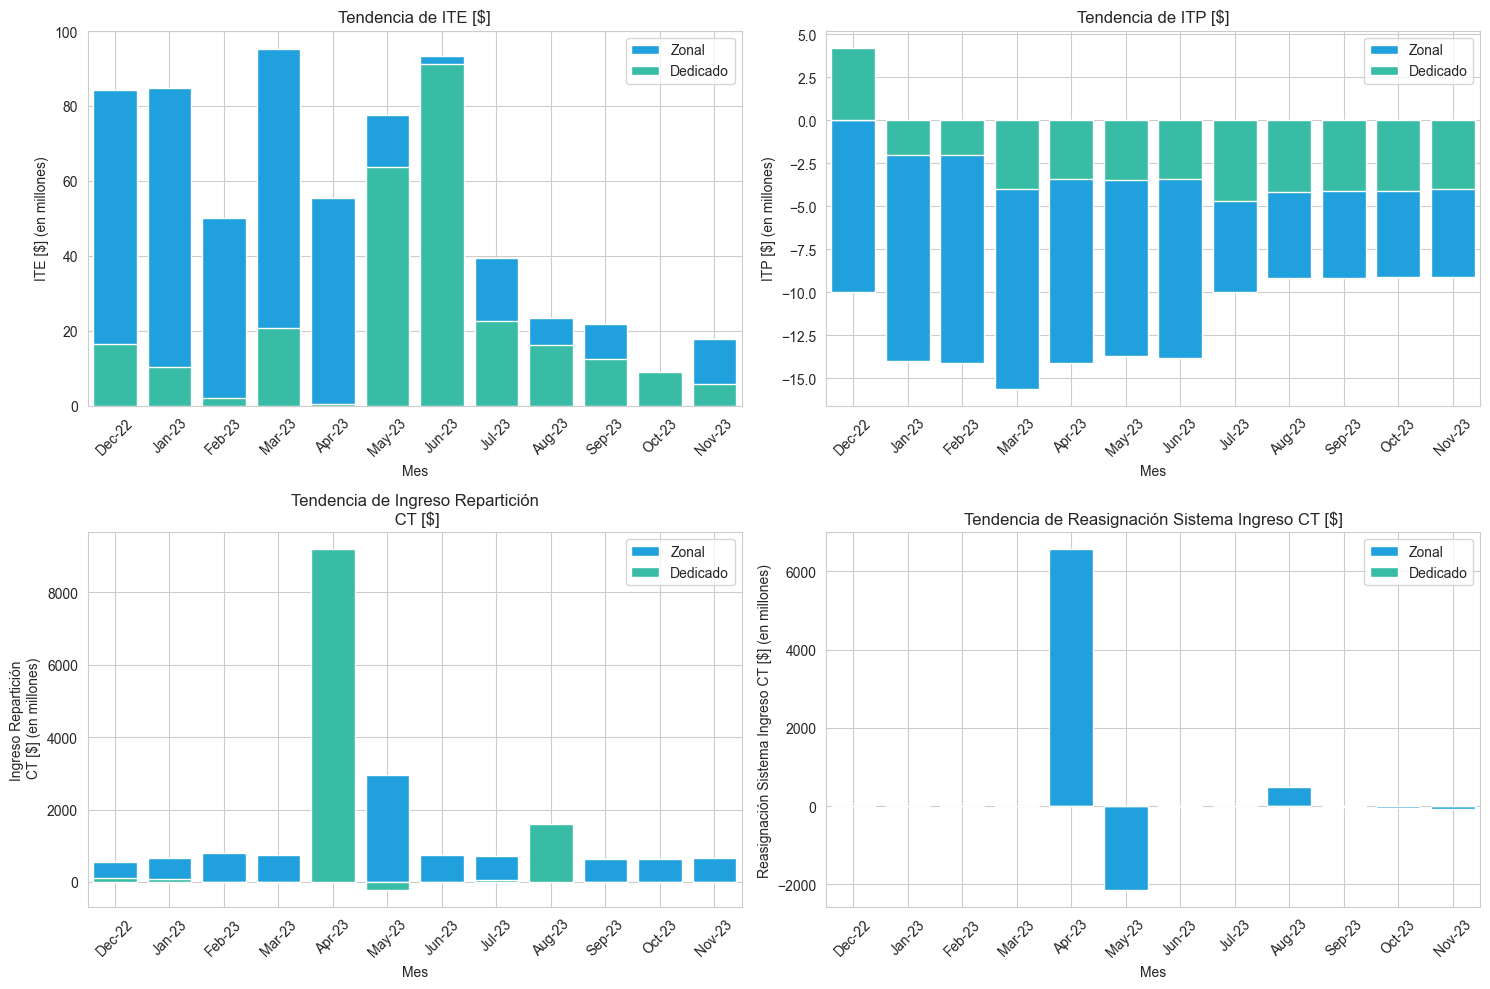

In [8]:
# Renombrar columnas en df_IngresosTotales_dedicado para que coincidan con df_IngresosTotales_zonal
df_IngresosTotales_dedicado.rename(columns={'Ingreso Repartición CT [$]': 'Ingreso Repartición\n CT [$]'}, inplace=True)

# Agregar columna faltante en 'Dedicado' con ceros
df_IngresosTotales_dedicado['Reasignación Sistema Ingreso CT [$]'] = 0

# Asegurarse de que 'MES' está en formato de fecha y los datos están ordenados
df_IngresosTotales_zonal['MES'] = pd.to_datetime(df_IngresosTotales_zonal['MES'])
df_IngresosTotales_dedicado['MES'] = pd.to_datetime(df_IngresosTotales_dedicado['MES'])
df_IngresosTotales_zonal.sort_values('MES', inplace=True)
df_IngresosTotales_dedicado.sort_values('MES', inplace=True)

# Definición de la paleta de colores para Zonal y Dedicado
colores = ["#01ACFB", "#23D2B5"]  # Azul Corporativo y Turquesa

# Componentes de IngresosTotales
componentes = ['ITE [$]', 'ITP [$]', 'Ingreso Repartición\n CT [$]', 'Reasignación Sistema Ingreso CT [$]']

# Crear una figura para los subgráficos en una cuadrícula 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Aplanar el array de ejes para facilitar el acceso en el bucle
axes = axes.flatten()

# Iterar sobre cada componente para crear un subgráfico
for i, comp in enumerate(componentes):
    # Graficar Zonal y Dedicado en el mismo eje
    sns.barplot(data=df_IngresosTotales_zonal, x='MES', y=comp, ax=axes[i], color=colores[0], label='Zonal')
    sns.barplot(data=df_IngresosTotales_dedicado, x='MES', y=comp, ax=axes[i], color=colores[1], label='Dedicado')

    # Formatear el eje x en el formato "mmm-YY"
    meses_unicos = df_IngresosTotales_zonal['MES'].dt.strftime("%b-%y").unique()
    axes[i].set_xticks(range(len(meses_unicos)))
    axes[i].set_xticklabels(meses_unicos, rotation=45)

    # Configuración y decoración de cada subgráfico
    axes[i].set_title(f'Tendencia de {comp}')
    axes[i].set_ylabel(f'{comp} (en millones)')
    axes[i].set_xlabel('Mes')
    axes[i].grid(True)
    axes[i].legend()

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
!pip install --upgrade jupyterlab
